# 学生生源地、高考成绩对大学成绩的影响分析


In [1]:
#设定字符编码
import sys
stdout=sys.stdout
reload(sys)
sys.setdefaultencoding( "utf-8")
sys.stdout=stdout

读取学生的有关信息

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
%matplotlib inline


#导入数据
filename="data/xsxx2016.xlsx"
data=pd.read_excel(filename) #导入数据,index_col=u'学号

In [3]:
data.head()

,年级,专业,班级,院(系)/部,身份证号,学号,姓名,性别,出生日期,民族,生源省份,毕业中学,毕业类别,生源地区,入学成绩,考生类别,未通过课程环节数,平均成绩
0,2016,机械设计与制造,16114,机械工程学院,421182199608204715,201401010238,汤乐,男,19960820,汉族,湖北省,武穴市育才高级中学,0,湖北省武穴市,449.00,农村应届,0,80.45
1,2016,机械设计与制造,16114,机械工程学院,420581199507081239,201401010411,陈磊,男,19950708,汉族,湖北省,湖北省宜都市第二中学,0,湖北省宜都市,329.00,农村应届,0,80.82
2,2016,机械设计与制造,16114,机械工程学院,422202199810146517,201601010109,张政,男,19981014,汉族,湖北省,应城市第一高级中学,NaN,湖北省应城市,340.10,农村应届,2,64.00
3,2016,机械设计与制造,16114,机械工程学院,42092119971222461X,201601010401,米宏超,男,19971222,汉族,NaN,锡盟技工学校,职业高中,NaN,242.00,农村应届,2,74.00
4,2016,机械设计与制造,16114,机械工程学院,513723199504189692,201601010402,张磊,男,19950418,汉族,四川省,大竹中学,NaN,NaN,431.06,农村往届,0,78.91


## 1.高考成绩与大学成绩的相关性分析

部分学生的高考成绩为0，单招、技能高考、普通高考学生的总分可能不一样，应该分别分析；需分析清楚不同省份的高考成绩总分是否一致

              入学成绩         平均成绩
count  4477.000000  4477.000000
mean    313.929692    77.119596
std     144.651073     8.204194
min       0.000000    11.880000
25%     279.840000    73.670000
50%     331.100000    78.900000
75%     372.100000    82.450000
max     627.000000    93.670000


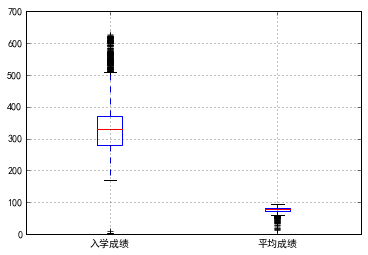

In [4]:

data_rx=data[[u'入学成绩',u'平均成绩']]
data_rx=data_rx.dropna()
p=data_rx.describe()
print(p)

plt.figure()
pp=data_rx.boxplot(return_type='dict')
x=pp['fliers'][0].get_xdata()
y=pp['fliers'][0].get_ydata()



## 2.考生生源地与大学成绩的相关性分析

分析不同省份的生源对在校学习情况有没有显著不同，应使用方差分析进行验证

              平均成绩
生源省份              
云南省      76.910435
内蒙古自治区   73.383333
吉林省      71.114545
四川省      81.651250
安徽省      78.385455
山东省      78.380571
山西省      76.466620
广东省      81.692143
广西壮族自治区  76.368750
江苏省      82.450000
江西省      82.302812
河北省      74.308571
河南省      78.439302
浙江省      80.768667
海南省      67.437778
湖北省      77.014383
湖南省      76.688704
甘肃省      77.391468
福建省      77.440000
贵州省      77.922500
辽宁省      78.248824
重庆市      79.697143
陕西省      77.469286
黑龙江省     74.524400


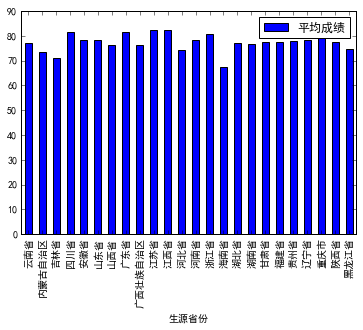

In [5]:
data2=data.copy()
data2=data2.loc[:,[u'生源省份',u'平均成绩']].dropna()
avdata2=data2.groupby(data2[u'生源省份']).mean()
print(avdata2)

avdata2.plot(kind='bar')

## 3.考生的家庭（农村、城镇）对大学成绩的相关性分析

分析农村入学、城镇入学的学生，到校后的学习情况有没有显著性差异

      平均成绩
考生类别      
农村应届  2874
农村往届   142
城镇应届  1364
城镇往届    95
           平均成绩
考生类别           
农村应届  77.812857
农村往届  78.916056
城镇应届  75.489890
城镇往届  76.906421


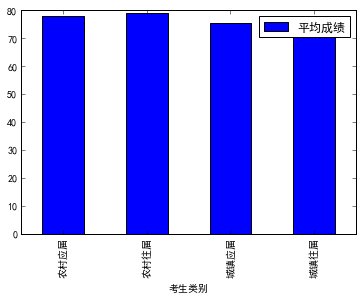

In [6]:
data_sh=data[[u'考生类别',u'平均成绩']].copy()
data_sh=data_sh.dropna()
avdata_sh=data_sh.groupby(data_sh[u'考生类别']).mean()
codata_sh=data_sh.groupby(data_sh[u'考生类别']).count()
print codata_sh
print avdata_sh
avdata_sh.plot(kind='bar')


## 学生学业预测

根据学生的专业、生源省份、考生类别、生活环境、入学成绩等因素使用决策树、随机森林算法进行数据挖掘，对学生的学业情况进行预测。

In [7]:
data_xy=data[[u'专业',u'生源省份',u'毕业类别',u'入学成绩'，u'考生类别',u'平均成绩']]
data_xy=data_xy.dropna()


SyntaxError: invalid syntax (<ipython-input-7-3bd387a5a5ef>, line 1)

In [ ]:
%debug
